In [47]:
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries

In [48]:
APIkey = "2SRLF3NBCPEO7UI5"

from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key=APIkey, output_format="pandas")
data, _ = ts.get_daily(symbol="TSLA", outputsize="full")
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-08-15,205.02,215.8800,204.82,214.14,89848530.0
2024-08-14,207.39,208.4400,198.75,201.38,70250014.0
2024-08-13,198.47,208.4900,197.06,207.83,76247387.0
2024-08-12,199.02,199.2600,194.67,197.49,64044903.0
2024-08-09,197.05,200.8800,195.11,200.00,58648274.0
...,...,...,...,...,...
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0


# Cholesky Decomposition

Cholesky factorization is a decomposition of a <u> positive-definite </u>, <u> symmetric matrix </u> into a product of a triangular matrix and its conjugate transpose:

$ C = L L^T $

where,

$C:$ $(d \times d)$ **correlation** matrix of $d$ different stock rate of returns.

$L:$ $(d \times d)$ lower triangular Cholesky matrix, which will be used to multiply $d$ standard random variables $Z_i \quad i.i.d \sim N(0, 1)$ to create new <u> correlated</u> values (stock returns).

To create correlated values using the **Cholesky** matrix $L$,

$Z = \begin{bmatrix}
Z_1 \\
Z_2 \\
\cdots \\
Z_d
\end{bmatrix}
$ where $Z_i \quad iid \sim N(0, 1)$

Then we multiply Cholesky matrix $L$ with our standard gaussian vector $Z$ to obtain correlated values vector $\epsilon:$

$\epsilon = L Z$

In [49]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

tickers = ["AAPL", "AMZN", "META", "GOOG", "MSFT"]
df_tickers = yf.download(tickers, period="10y")["Adj Close"]
df_tickers.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,META,MSFT
Date,,,,,
2014-08-18,22.011223,16.7265,28.995308,74.437035,38.330494
2014-08-19,22.315325,16.7565,29.229397,75.135605,38.758018
2014-08-20,22.324209,16.7890,29.111357,74.656578,38.433102
2014-08-21,22.326427,16.6455,29.055573,74.417084,38.663948
2014-08-22,22.490694,16.5795,29.015230,74.417084,38.604111


In [50]:
df_returns = (df_tickers.diff() / df_tickers).dropna()
df_returns.head()

Ticker,AAPL,AMZN,GOOG,META,MSFT
Date,,,,,
2014-08-19,0.013627,0.001790,0.008009,0.009297,0.011031
2014-08-20,0.000398,0.001936,-0.004055,-0.006416,-0.008454
2014-08-21,0.000099,-0.008621,-0.001920,-0.003218,0.005971
2014-08-22,0.007304,-0.003981,-0.001390,0.000000,-0.001550
2014-08-25,0.002167,0.007275,-0.004068,0.005998,0.000443


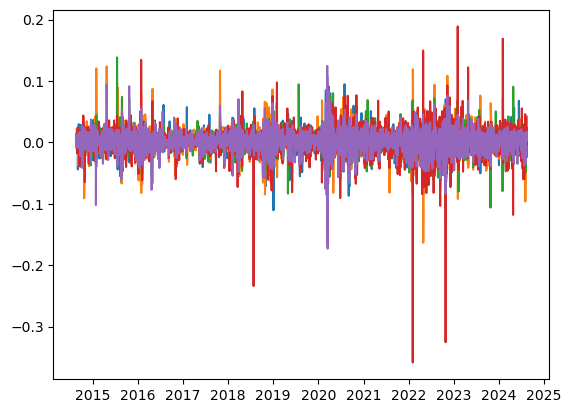

In [51]:
plt.plot(df_returns)

In [53]:
# Volatilities
df_returns.std()

Ticker
AAPL    0.018013
AMZN    0.020526
GOOG    0.017756
META    0.024340
MSFT    0.017102
dtype: float64

In [55]:
corr_matrix = df_returns.corr()  # Correlation matrix
corr_matrix

Ticker,AAPL,AMZN,GOOG,META,MSFT
Ticker,,,,,
AAPL,1.000000,0.558791,0.611844,0.517462,0.684703
AMZN,0.558791,1.000000,0.654769,0.580099,0.648670
GOOG,0.611844,0.654769,1.000000,0.616425,0.722178
META,0.517462,0.580099,0.616425,1.000000,0.574530
MSFT,0.684703,0.648670,0.722178,0.574530,1.000000


In [57]:
L = np.linalg.cholesky(corr_matrix)
L

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.55879129, 0.82930832, 0.        , 0.        , 0.        ],
       [0.61184433, 0.37727267, 0.69520633, 0.        , 0.        ],
       [0.51746227, 0.35082875, 0.24087927, 0.74238074, 0.        ],
       [0.68470327, 0.32082557, 0.26209147, 0.05998949, 0.59662526]])

In [60]:
# Check if L @ L^T equals corr_matrix
np.isclose(L @ L.T, corr_matrix)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [73]:
d = L.shape[0]  # shape of the Cholesky matrix

# Generate a standard gaussian vector z
z = np.random.standard_normal(d)

# Generate correlated values vector
epsilon = L @ z
epsilon

array([ 0.01773963,  0.35296813,  0.4679505 , -0.1487568 ,  0.39052739])

In [ ]:
# np.random.choice(["bahçeşehir", "çorlu"])